In [2]:
from sklearn.cluster import KMeans
import numpy as np
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy
from PIL import Image
from scipy.spatial import ConvexHull
import sys
from skimage.measure import label
import matplotlib.tri as mtri

# preprocessing

In [3]:
def getConnectedPoints(i):
    l = []
    for o in range(cleftsA.shape[0]):
        for p in range(cleftsA.shape[1]):
            for q in range(cleftsA.shape[2]):
                if lb[0][o,p,q] == i:
                    l.append([o,p,q])
    return l

In [4]:
def getVolume(points):
    n = np.array(points)
    n = n.T
    xMAX = max(n[1,:])
    xMIN = min(n[1,:])
    yMAX = max(n[2,:])
    yMIN = min(n[2,:])
    zMAX = max(n[0,:])
    zMIN = min(n[0,:])
    return (xMAX,xMIN,yMAX,yMIN,zMAX,zMIN)

In [5]:
def get3DPoints(points):
    l3D = []
    v = getVolume(points)
    xMIN = v[1]
    yMIN = v[3]
    zMIN = v[5]
    for i in points:
        for j in range(10):
            l3D.append([i[1]-xMIN,i[2]-yMIN,(i[0]-zMIN)*10+j])
    return l3D

In [6]:
cd /home/siyan/projects/cluster

/home/siyan/projects/cluster


In [7]:
with h5py.File('data/cremi/gt-syn/syn_A_v2_200.h5','r') as f:
    cleftsA = f['main'][:]

In [8]:
lb = label(input=cleftsA, background=0, connectivity=2, return_num=True)

points = getConnectedPoints(1)
v = getVolume(points)

In [9]:
l3D = get3DPoints(points)

In [10]:
len(l3D)

13300

In [11]:
a = np.array(l3D)

In [163]:
a

array([[ 6, 26,  0],
       [ 6, 26,  1],
       [ 6, 26,  2],
       ...,
       [33, 34, 37],
       [33, 34, 38],
       [33, 34, 39]])

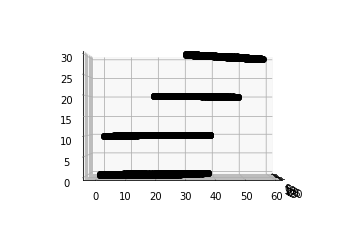

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax.plot(a.T[0], a.T[1], a.T[2], "ko")
ax.view_init(elev=0, azim=0)

In [12]:
m = np.zeros((v[0]-v[1]+41,v[2]-v[3]+41,(v[4]-v[5]+1)*10+40))
print (m.shape)

(74, 99, 80)


In [13]:
for p in l3D:
    m[p[0]+20,p[1]+20,p[2]+20] = 1

### (1) use dilation and erosion to smooth

Remind that the method here is REALLY stupid. It would be much more better to use distance transform

In [1]:
#dilation

In [17]:
#erosion
for x in range(20):
    boundry=[]
    print (m.sum())
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            for k in range(m.shape[2]):
                b = False
                if m[i,j,k] == 1:   
                    if (i == 0) or (i == m.shape[0]-1) or (j == 0) or (j == m.shape[1]-1) or (k == 0) or (k==m.shape[2]-1):
                        b = True
                    elif m[i+1,j,k] * m[i-1,j,k] * m[i,j+1,k] * m[i,j-1,k] *m[i,j,k+1]*m[i,j,k-1] == 0:
                        b = True
                if b == True:
                    boundry.append([i,j,k])
    for b in boundry:
        m[b[0],b[1],b[2]] = 0
          

183327.0
170765.0
158692.0
147101.0
135984.0
125334.0
115144.0
105406.0
96113.0
87261.0
78844.0
70854.0
63283.0
56123.0
49370.0
43019.0
37065.0
31501.0
26321.0
21525.0


In [299]:
m.sum()

17142.0

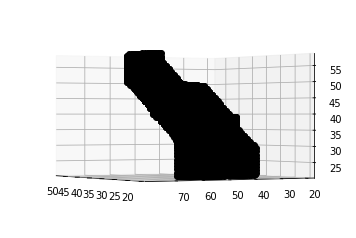

In [308]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax.plot(h.T[0], h.T[1], h.T[2], "ko")
ax.view_init(elev=0, azim=150)

In [18]:
#3d skeleton
from skimage import morphology,draw
M = np.zeros((m.shape[2],m.shape[0],m.shape[1]))
for i in range(M.shape[0]):
    M[i,:,:] = m[:,:,i]
skeleton =morphology.skeletonize_3d(M)
print (skeleton.shape)
s = []
for i in range(skeleton.shape[0]):
    for j in range(skeleton.shape[1]):
        for k in range(skeleton.shape[2]):
            if skeleton[i,j,k] != 0:
                s.append([i,j,k])
    
s= np.array(s)

/home/siyan/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(80, 74, 99)


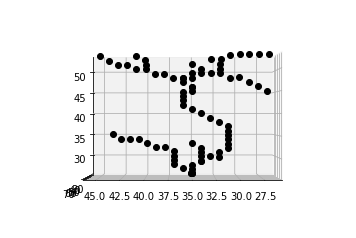

In [21]:
figs = plt.figure()
axs = figs.add_subplot(111, projection="3d")

axs.plot(s.T[1], s.T[2], s.T[0], "ko")
axs.view_init(elev=0, azim=90)

### (2) mtri.Triangulation()

I still not fully understand this method...So this is just a naive exploration.

In [18]:
x = a.T[0]

In [19]:
y = a.T[1]
z = a.T[2]

In [20]:
triang = mtri.Triangulation(x, y)

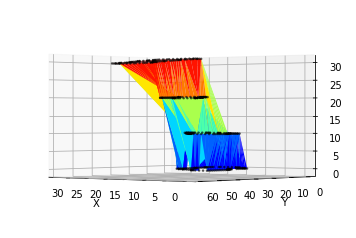

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_trisurf(triang, z, cmap='jet')
ax.scatter(x,y,z, marker='.', s=10, c="black", alpha=0.5)
ax.view_init(elev=60, azim=-45)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=0, azim=130)
plt.show()

In [22]:
xi, yi = np.meshgrid(np.linspace(0,35,70),np.linspace(0,60, 120))

In [23]:
interp_cubic_geom=mtri.CubicTriInterpolator(triang,z,kind='geom')

ValueError: shape mismatch: value array of shape (326,) could not be broadcast to indexing result of shape (310,)

In [26]:
from skimage import measure
verts, faces, normals, values = measure.marching_cubes_lewiner(m, 0)

In [29]:
verts

array([[ 0., 53., 30.],
       [ 1., 54., 29.],
       [ 1., 53., 30.],
       ...,
       [33., 34., 29.],
       [33., 34., 31.],
       [33., 35., 30.]], dtype=float32)

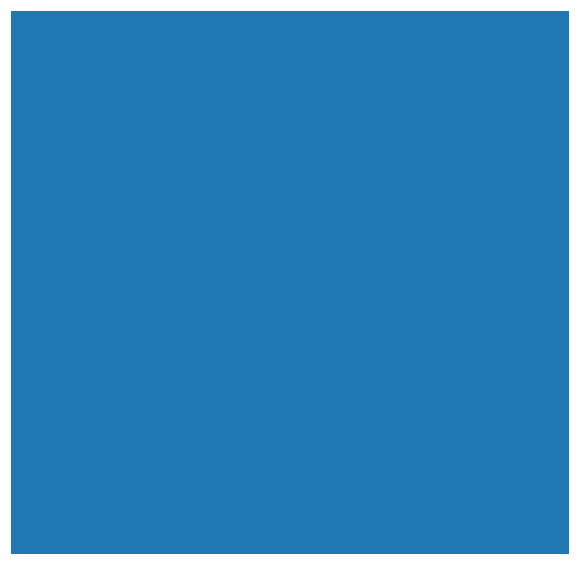

In [28]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

In [32]:
from skimage.draw import ellipsoid


# Generate a level set about zero of two identical ellipsoids in 3D
ellip_base = ellipsoid(6, 10, 16, levelset=True)
ellip_double = np.concatenate((ellip_base[:-1, ...],
                               ellip_base[2:, ...]), axis=0)

In [40]:
np.linspace(0,34,35)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34.])

# (3) interpolation

remind that scipy.interpolate is not as good as cv2.resize. (This was writen at the very beginning of the summer, just have learnt A LOT during the summer!)

In [166]:
from scipy.interpolate import RegularGridInterpolator
from numpy import linspace, zeros, array
x = np.linspace(0,33,34)
y = np.linspace(0,58,59)
z = np.linspace(0,39,40)
V = m

fn = RegularGridInterpolator((x,y,z), V,method = 'nearest')


In [137]:
fn([33,34,2.6])

array([1.])

In [167]:
hhh = []
for i in range(m.shape[0]):
    for j in range(m.shape[1]):
        for k in range(m.shape[2]):
                if fn(np.array([i,j,k])) != 0:
                    hhh.append([i,j,k])
h = np.array(hhh)



In [168]:
len(hhh)

13300

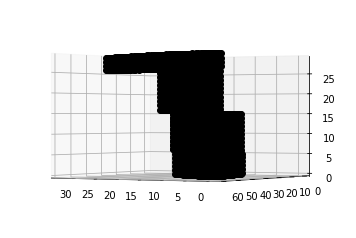

In [146]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax.plot(h.T[0], h.T[1], h.T[2], "ko")
ax.view_init(elev=0, azim=120)